In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [10]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [14]:
plt.rcParams["font.family"] = "Arial"

In [15]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 4.5, 5])


def compute_cost(theta0, theta1):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    cost = -0.5 * np.sum(error ** 2)
    return cost

In [16]:
theta0_vals = np.linspace(-2, 4, 100)
theta1_vals = np.linspace(-2, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        cost_grid[i, j] = compute_cost(theta0_vals[i], theta1_vals[j])

theta0_slider = widgets.FloatSlider(
    value=0, min=-2, max=4, step=0.1, description='Theta0:')
theta1_slider = widgets.FloatSlider(
    value=0, min=-2, max=4, step=0.1, description='Theta1:')

figure_container = widgets.Output()


def update_figure(change):
    with figure_container:
        clear_output(wait=True)
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.contourf(theta0_grid, theta1_grid, cost_grid,
                     levels=20, cmap='viridis')
        plt.colorbar(label='Cost')

        true_theta0 = 1.0
        true_theta1 = 1.0
        plt.scatter([true_theta0], [true_theta1], color='blue',
                    marker='o', label='True Values')
        plt.scatter([theta0_slider.value], [theta1_slider.value],
                    color='red', marker='x', label='Current Values')
        plt.xlabel('Theta0')
        plt.ylabel('Theta1')
        plt.title('Log Likelihood Contour Plot')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.scatter(X, y, label='Data')
        plt.plot(X, theta0_slider.value + theta1_slider.value *
                 X, color='red', label='Line Fit')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression Line Fit')
        plt.legend()

        # plt.tight_layout()
        plt.show()


theta0_slider.observe(update_figure, 'value')
theta1_slider.observe(update_figure, 'value')

update_figure(None)

display(widgets.HBox(
    [figure_container, widgets.VBox([theta0_slider, theta1_slider])]))

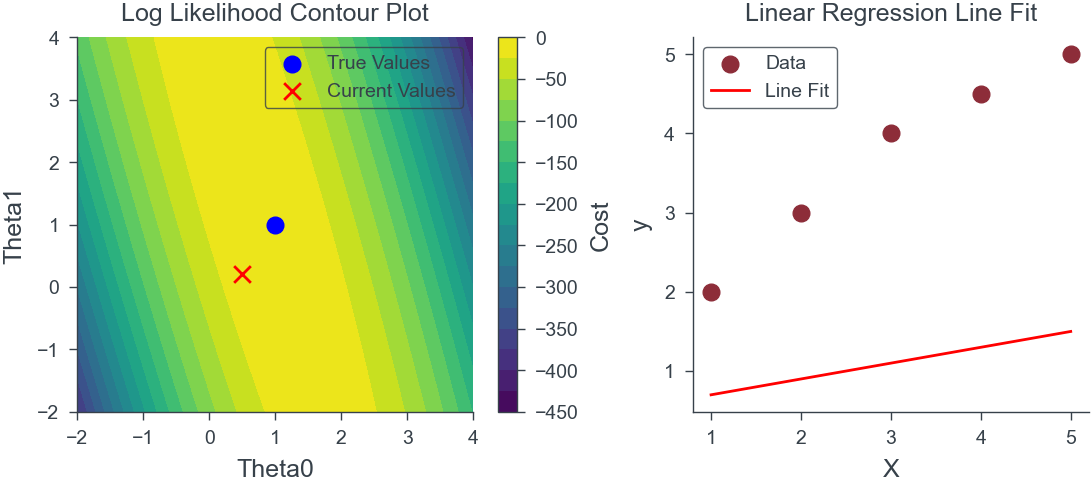

In [30]:
# plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(theta0_grid, theta1_grid, cost_grid, levels=20, cmap='viridis')
plt.colorbar(label='Cost')

true_theta0 = 1.0
true_theta1 = 1.0
plt.scatter([true_theta0], [true_theta1], color='blue',
            marker='o', label='True Values')
plt.scatter([0.5], [0.2], color='red', marker='x', label='Current Values')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Log Likelihood Contour Plot')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Data')
plt.plot(X, 0.5 + 0.2 * X, color='red', label='Line Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Line Fit')
plt.legend()

# plt.tight_layout()
plt.savefig('figures/mle/lin_reg_slider_1.pdf')